Influenza virus is a significant cause of morbidity and mortality, with worldwide seasonal epidemics. Proper surveillance and tracking of influenza is critical in the formation of yearly defensive vaccines, and also supports the creation of a universal vaccine at some point in the future. To further these aims, we first must uncover which strains or serotypes of influenza are the most common. Next, we need to determine if there are any underlying patterns in the distribution of influenza. Are there certain geographic locations which are impacted by the virus more than others? What role does population density play a role in the distribution of the virus? Do the different strains of virus “compete” with one another during a flu season? If one strain is dominant in a year, does that lower the prevalence rate of other strains?

The dataset being utilized is from the CDC database on reported, submitted, and genomically confirmed influenza cases. The dataset includes the length of genome required to confirm the presence of the virus, the host species, the country of origin, the date recovered, and the strain of the virus. Our database only goes back to the year 2000, as surveillance and data collection on the virus prior to 2000 was sorely lacking. First, all host species names and styles were standardized, and the dates were simplified down to exclusively the year. City or country names were isolated from the strain names to, and those without an origin were scrubbed from the data. The top three host strains (human, avian, swine) were selected as they comprised the overwhelming majority of influenza cases. The data was then grouped by serotype and two serotypes, H1N1 and H3N2 comprised over 90% of all cases, so a decision was made to focus on those strains. Next, the total number of cases were plotted by their locations. For the sake of this capstone, the top 20 locations were selected. This data was cross referenced with estimated population density, often of the largest city in the region, which would be where the majority of reported cases would come from. 

A cursory analysis of this data raises a very pertinent question: do the two major serotypes of influenza exhibit any level of competitive inhibition? A cursory analysis of this suggests that if one serotype is more prevalent in a given year, the other major serotype is more likely to be diminished in pervasiveness, however we do not have enough surveillance data currently to adequately answer this question. An initial experiment would be to take a large population of mice and infect a small number with one strain of the virus. 48 hours later, you infect another part of the population with the second strain of the virus. Observer the changes in prevalence of the disease over next one to two weeks. As more surveillance data is collected, you can also continue to compare the rate of cases between the two serotypes. A time series regression can be run to analyze if there is a significant difference from the mean rates between the serotypes. Also, a Granger causality test can be done to tell if the rise/fall of one strain is impacting the rise/fall of another.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import datetime
import folium
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from geopy.geocoders import Nominatim
%matplotlib inline

c:\users\zackb\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
flu = pd.read_csv('flu_df.csv', low_memory=False)

In [3]:
flu.groupby('host').size().sort_values(ascending=False)

host
Human             186022
Avian              83118
Swine              57600
Environment         5092
Canine              1873
Equine               379
Feline                72
Seal                  43
Ferret                40
Mink                  37
Bat                   30
Cheetah               14
Cat                   12
Sloth bear            10
Giant anteater         5
dtype: int64

In [4]:
flu['host'] = flu['host'].apply(lambda x: str(x).capitalize())
flu['name'] = flu['name'].replace('Managua', 'Nicaragua')

In [5]:
def host_species(host):
    return flu.loc[flu['host'] == host]

human = host_species('Human')
avian = host_species('Avian')
environment = host_species('Environment')
swine = host_species('Swine')

In [6]:
human['date'] = pd.DatetimeIndex(human.loc[:, 'date']).year

human

c:\users\zackb\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,accession,length,host,protein,serotype,country,region,date,name,mutations,age,gender,lineage,vac_strain
0,AGI53222,252,Human,M1,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),S31N,NaN,NaN,NaN,NaN
1,AGI53223,97,Human,M2,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),S31N,NaN,NaN,NaN,NaN
2,AGI53224,469,Human,NaN,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
3,AGI53225,566,Human,HA,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
4,AGI54943,219,Human,NS1,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
5,AGI54944,121,Human,NS2,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
6,AGI54945,757,Human,PB1,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
7,AGI54946,759,Human,PB2,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
8,AGI54947,498,Human,NP,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN
9,AGI54948,716,Human,PA,H1N1,USA,N,2010,Influenza A virus (A/Alabama/01/2010(H1N1)),NaN,NaN,NaN,NaN,NaN


In [7]:
def serotype(host, subtype):
    return host.loc[host['serotype'] == subtype]

h1n1 = serotype(human, 'H1N1')
h3n2 = serotype(human, 'H3N2')

In [8]:
first = human.groupby(['date', 'serotype']).size().reset_index()
first.columns = ['Date', 'Serotype', 'Count']
first =  first.pivot_table('Count', ['Date'], columns='Serotype', fill_value=0)
first

Serotype,H1,H1N1,H1N2,H3,H3N2,H7N2,H7N3,N1,N2,mixed,"mixed,H1","mixed,H3","mixed,N1","mixed,N2",unknown
Date,,,,,,,,,,,,,,,
2000,0,60,0,0,410,0,0,2,3,0,0,0,0,0,0
2001,0,431,9,0,200,0,0,4,8,0,0,0,0,0,0
2002,0,36,38,0,851,0,0,5,2,9,1,0,0,1,0
2003,1,298,231,107,1446,10,0,6,40,0,0,0,0,0,0
2004,0,19,0,56,985,0,11,1,5,0,0,0,0,0,0
2005,0,45,0,70,1090,0,0,2,3,0,0,0,0,0,0
2006,4,355,0,47,1088,0,0,3,13,0,0,0,0,0,0
2007,2,4300,1,4,2178,0,0,0,0,0,0,0,0,0,0
2008,0,1814,0,0,2975,0,0,0,0,0,0,0,0,0,0


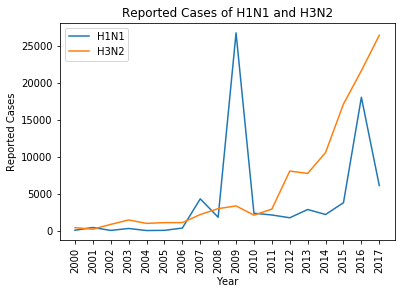

In [9]:
plt.plot(first['H1N1'])
plt.plot(first['H3N2'])
plt.ylabel('Reported Cases')
plt.xlabel('Year')
plt.xticks(first.index, rotation='vertical')
plt.legend()
plt.title('Reported Cases of H1N1 and H3N2')

plt.show()

In [10]:
t_series = sm.tsa.adfuller(first['H1N1'])
print('adf: ', t_series[0])
print('p-value: ', t_series[1])
print('Critical Values: ', t_series[4])

if t_series[0] > t_series[4]['5%']:
    print('Time series is not stationary.')
else:
    print('Time series is stationary.')

adf:  -0.924441710325
p-value:  0.779816896128
Critical Values:  {'1%': -4.3315729999999997, '5%': -3.2329500000000002, '10%': -2.7486999999999999}
Time series is not stationary.


In [11]:
t_series1 = sm.tsa.adfuller(first['H3N2'])
print('adf: ', t_series1[0])
print('p-value: ', t_series1[1])
print('Critical Values: ', t_series1[4])

if t_series1[0] > t_series1[4]['5%']:
    print('Time series is not stationary.')
else:
    print('Time series is stationary.')

adf:  0.13455513677
p-value:  0.968342667831
Critical Values:  {'1%': -4.3315729999999997, '5%': -3.2329500000000002, '10%': -2.7486999999999999}
Time series is not stationary.


In [12]:
g_caus = sm.tsa.stattools.grangercausalitytests(first[['H1N1', 'H3N2']].dropna(),1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3963  , p=0.1439  , df_denom=14, df_num=1
ssr based chi2 test:   chi2=2.9098  , p=0.0880  , df=1
likelihood ratio test: chi2=2.6860  , p=0.1012  , df=1
parameter F test:         F=2.3963  , p=0.1439  , df_denom=14, df_num=1


In [13]:
date = first.index
y1 = first['H1N1']
x1 = first['H3N2']
x2 = sm.add_constant(x1)
model = sm.OLS(y1, x2)
results = model.fit()
results.summary()

c:\users\zackb\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   H1N1   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     2.387
Date:                Mon, 05 Feb 2018   Prob (F-statistic):              0.142
Time:                        20:41:08   Log-Likelihood:                -183.22
No. Observations:                  18   AIC:                             370.4
Df Residuals:                      16   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2081.8803   2047.498      1.017      0.324   -2258.621    6422.382
H3N2           0.3221      0.208      1.545      0.142      -0.120       0.764
==============================================================================
Omnibus:                       33.973   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.825
Skew:                           2.900   Prob(JB):                     1.13e-15
Kurtosis:                      10.624   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
split = human['name'].str.split('/', expand=True)
split[1] = split[1].apply(lambda x: str(x).capitalize())

In [15]:
location_ost = split.groupby(split[1]).size().sort_values(ascending=False)
location_ost = pd.DataFrame(location_ost)
location_ost.reset_index(level=0, inplace=True)
location_ost.columns=['Location', 'Cases']
location_20 = location_ost[:20]
cases= list(location_20['Cases'])
location_20

,Location,Cases
0,New york,19403
1,California,12806
2,Texas,10446
3,Boston,8882
4,Wisconsin,7908
5,Florida,5793
6,Alaska,5097
7,Washington,4507
8,Nicaragua,4413
9,Hawaii,4282


In [16]:
geolocator = Nominatim()

In [17]:
loc_list = []
for each in location_20['Location']:
    new_loc = geolocator.geocode(each)
    loc_list.append((new_loc.latitude, new_loc.longitude))

print(loc_list)

[(40.7306458, -73.9866136), (36.7014631, -118.7559974), (31.8160381, -99.5120986), (42.3604823, -71.0595678), (44.4308975, -89.6884637), (27.7567667, -81.4639835), (64.4459613, -149.680909), (38.8949549, -77.0366456), (12.3724928, -84.8700308), (21.2160437, -157.975203), (43.6211955, -84.6824346), (40.9699889, -77.7278831), (12.1461244, -86.273717), (40.0796319, -89.4339809), (34.395342, -111.7632755), (35.7730076, -86.2820081), (37.5726028, -85.1551411), (35.6729639, -79.0392919), (41.9216734, -93.3122705), (38.7251776, -105.6077167)]


In [18]:
pop_density = pd.read_csv('pop_density.csv')
pop_density = list(pop_density['Population Density Millions'])

In [19]:
def location_list(data):
    list_1 = []
    for index, row in data.iterrows():
        list_1.append(row['Location'])
    return list_1
x = location_list(location_20)
new_df = pd.DataFrame(loc_list, x)
new_df.columns = ['Lat', 'Lng']
new_df = new_df.assign(Cases=cases)
new_df = new_df.assign(Population_Density_Millions=pop_density)
new_df

,Lat,Lng,Cases,Population_Density_Millions
New york,40.730646,-73.986614,19403,19.75
California,36.701463,-118.755997,12806,39.25
Texas,31.816038,-99.512099,10446,27.86
Boston,42.360482,-71.059568,8882,6.81
Wisconsin,44.430898,-89.688464,7908,5.78
Florida,27.756767,-81.463983,5793,20.61
Alaska,64.445961,-149.680909,5097,0.74
Washington,38.894955,-77.036646,4507,7.29
Nicaragua,12.372493,-84.870031,4413,6.15
Hawaii,21.216044,-157.975203,4282,1.43


In [20]:
map_2 = folium.Map(location=[10, -90], zoom_start=2.5, tiles="Stamen Toner")
for index, row in new_df.iterrows():
    folium.CircleMarker(location=[row['Lat'], row['Lng']],
                       popup=index,
                       radius=row['Cases']/1000).add_to(map_2)

map_2.save('map.html')
map_2


In [21]:
mod = ols('Cases ~ Population_Density_Millions', data=new_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print(aov_table)
print(esq_sm)

                                   sum_sq    df          F    PR(>F)
Population_Density_Millions  1.466873e+08   1.0  12.247903  0.002558
Residual                     2.155774e+08  18.0        NaN       NaN
0.404917430539
